In [1]:
import pandas as pd
import numpy as np
import pickle
import eli5

In [2]:
data = pd.read_csv(r"E:\Dropbox\Projects\rocket_league_analytics\data\xg\combined.csv")
data = data.rename(columns={'Unnamed: 0': 'idx'})
data.head()

idx   frame   time   goal  is_orange  distanceToGoal   ball_pos_x  \
0    0   381.0    7.0  False        0.0     1019.005052    87.750000   
1    1   572.0   14.0   True        1.0     5033.497831 -2515.250000   
2    2  1713.0   47.0   True        0.0     2149.012623 -2715.070068   
3    3  2157.0   53.0  False        0.0     4808.746894  2490.590088   
4    4  4843.0  151.0   True        1.0     2642.278851  -537.159973   

    ball_pos_y  ball_pos_z    ball_vel_x  ...  opp_2_rot_y  opp_2_rot_z  \
0  4874.279785  141.470001  -2887.500000  ...     0.568640    -0.001792   
1  1438.719971  179.440002  17427.900391  ...     1.597565     0.000213   
2  3995.780029  372.029999  18758.699951  ...    -2.691832     0.174562   
3  1726.050049  157.779999  -9566.099854  ...     1.068619    -0.000016   
4  2920.159912  662.119995   1939.499969  ...     0.571247    -0.000047   

   opp_2_ball_cam  opp_2_boost  opp_2_boost_active  opp_2_double_jump_active  \
0            True    59.704809                True                     False   
1            True     0.000000                True                     False   
2            True   201.176344                True                     False   
3            True   255.000000               False                     False   
4            True   136.000000               False                         4   

   opp_2_dodge_active  opp_2_jump_active  opp_2_boost_collect Unnamed: 0.1  
0               False                  7                  NaN          NaN  
1                   8                  8                  NaN          NaN  
2                  12                 16                  NaN          NaN  
3                   6                  6                  NaN          NaN  
4                  10                 12                  NaN          NaN  

[5 rows x 120 columns]

In [3]:
col_list = ['idx'] + [col for col in data.columns if ("_pos_" in col or "_vel_" in col or "_rot_" in col) and "team_mate" not in col and "ball" not in col] + ['goal']
data_filtered = data[col_list]
data_filtered.head()

idx  shot_taker_pos_x  shot_taker_pos_y  shot_taker_pos_z  \
0    0         33.970001       4854.979980         15.870000   
1    1      -2692.719971       1254.349976        142.740005   
2    2      -2824.340088       3952.209961        280.359985   
3    3       2540.030029       1598.709961         92.989998   
4    4       -578.419983       2662.800049        630.090027   

   shot_taker_vel_x  shot_taker_vel_y  shot_taker_vel_z  shot_taker_ang_vel_x  \
0      -4997.600098       2740.199890        107.500000           -875.599976   
1      14675.100098      17544.300537       2415.599976          -1304.799957   
2      12034.399414      17071.800537       -679.300003          -1531.600037   
3         76.900001      19029.200439       2129.499969          -4522.399902   
4      -4337.500000      18262.199707       3161.199951          -2451.699982   

   shot_taker_ang_vel_y  shot_taker_ang_vel_z  ...   opp_2_vel_x  \
0            392.000008            961.299973  ...  11294.699707   
1           1270.500031           1605.800018  ...     28.599999   
2           1825.500031           4956.900024  ... -11673.900146   
3          -2942.999878           1065.599976  ...   7977.700195   
4           -354.700012           -480.600014  ... -11751.300049   

    opp_2_vel_y  opp_2_vel_z  opp_2_ang_vel_x  opp_2_ang_vel_y  \
0   6956.599731  3457.500000      -244.400005       333.699989   
1  22999.799805    66.300001        22.500000        -6.100000   
2  -4394.299927  3843.699951     -3243.699951      1350.299988   
3  17565.799561     2.300000        -0.100000         0.000000   
4   6466.599731     2.300000        -0.300000        -0.000000   

   opp_2_ang_vel_z  opp_2_rot_x  opp_2_rot_y  opp_2_rot_z   goal  
0      -840.199966     0.018121     0.568640    -0.001792  False  
1     -1364.299927    -0.010899     1.597565     0.000213   True  
2       595.299988    -0.274479    -2.691832     0.174562   True  
3     -2004.299927     0.009581     1.068619    -0.000016  False  
4     -2254.799957    -0.009561     0.571247    -0.000047   True  

[5 rows x 38 columns]

In [4]:
data_filtered.to_csv("rocket_league_data.csv")
data_filtered.columns

Index(['idx', 'shot_taker_pos_x', 'shot_taker_pos_y', 'shot_taker_pos_z',
       'shot_taker_vel_x', 'shot_taker_vel_y', 'shot_taker_vel_z',
       'shot_taker_ang_vel_x', 'shot_taker_ang_vel_y', 'shot_taker_ang_vel_z',
       'shot_taker_rot_x', 'shot_taker_rot_y', 'shot_taker_rot_z',
       'opp_1_pos_x', 'opp_1_pos_y', 'opp_1_pos_z', 'opp_1_vel_x',
       'opp_1_vel_y', 'opp_1_vel_z', 'opp_1_ang_vel_x', 'opp_1_ang_vel_y',
       'opp_1_ang_vel_z', 'opp_1_rot_x', 'opp_1_rot_y', 'opp_1_rot_z',
       'opp_2_pos_x', 'opp_2_pos_y', 'opp_2_pos_z', 'opp_2_vel_x',
       'opp_2_vel_y', 'opp_2_vel_z', 'opp_2_ang_vel_x', 'opp_2_ang_vel_y',
       'opp_2_ang_vel_z', 'opp_2_rot_x', 'opp_2_rot_y', 'opp_2_rot_z', 'goal'],
      dtype='object')

In [5]:
data_filtered = data_filtered.dropna()
X = data_filtered.iloc[:, :-1].values
y = data_filtered.iloc[:, -1].astype(int).values

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_X_train = sc.fit_transform(X_train[:,1:])
scaled_X_test = sc.transform(X_test[:,1:])

In [8]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression(random_state=0, max_iter=400)
reg.fit(scaled_X_train, y_train)
with open("../data/xg/xg.model", "wb") as f:
    pickle.dump(reg, f)
# This model can be read from file as follows
with open("../data/xg/xg.model", "rb") as f:
    reg2 = pickle.load(f)
reg2.coef_

array([[-0.01804827,  1.08397824,  0.08256435,  0.00758514,  0.30469391,
         0.43403747, -0.18475903,  0.16978639, -0.03182094, -0.11226797,
        -0.05572164, -0.01046256, -0.01539405, -0.32424344,  0.15578313,
         0.03036061,  0.15856351, -0.02836311, -0.05175151,  0.01270506,
        -0.08065833,  0.10079426,  0.01650169,  0.02564169, -0.03064451,
        -0.33951413,  0.0447653 , -0.09558232, -0.02489275, -0.21023718,
        -0.10939886, -0.10653446, -0.03058392, -0.15268927,  0.12262736,
        -0.00299062]])

In [9]:
y_pred = reg.predict(scaled_X_test)

In [10]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, roc_auc_score
"Test", accuracy_score(y_pred, y_test), "Train", accuracy_score(reg.predict(scaled_X_train), y_train), "ROC AUC Score", roc_auc_score(y_test, y_pred)

('Test',
 0.6909090909090909,
 'Train',
 0.7084282460136674,
 'ROC AUC Score',
 0.6690367232706781)

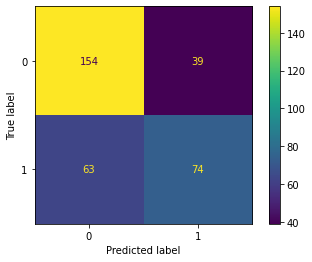

In [11]:
plot_confusion_matrix(reg, scaled_X_test, y_test)

In [12]:
xg_vals = reg.predict_proba(scaled_X_test)[:,1]
xg_vals

array([0.04883564, 0.16759308, 0.30184081, 0.46819146, 0.30224321,
       0.27010143, 0.73299327, 0.34279313, 0.54653344, 0.1825601 ,
       0.53372982, 0.65694225, 0.12835739, 0.22604479, 0.61175362,
       0.24469036, 0.62054475, 0.34959028, 0.28267383, 0.48207976,
       0.33193882, 0.37580194, 0.36982129, 0.53448188, 0.57118846,
       0.36734592, 0.61284922, 0.6531869 , 0.52001071, 0.47478384,
       0.30010713, 0.32563023, 0.55046678, 0.13768778, 0.16483087,
       0.12784252, 0.0597961 , 0.72305352, 0.24457842, 0.42343053,
       0.18694457, 0.50589123, 0.6313982 , 0.17843394, 0.20398609,
       0.81246584, 0.07053997, 0.37430088, 0.54425548, 0.41510351,
       0.39931962, 0.5591465 , 0.54414236, 0.31982474, 0.4326951 ,
       0.21953064, 0.36455084, 0.44986665, 0.68881437, 0.30624203,
       0.16344375, 0.17231845, 0.50713803, 0.72306234, 0.31666298,
       0.19399149, 0.27476388, 0.36587794, 0.36142503, 0.186707  ,
       0.17297405, 0.36585566, 0.20041158, 0.4558856 , 0.79142

In [13]:
X_copy = X_test[:, [0,1,2]]

In [14]:
final_vals = np.c_[X_copy, xg_vals*100]

In [15]:
import matplotlib.pyplot as plt

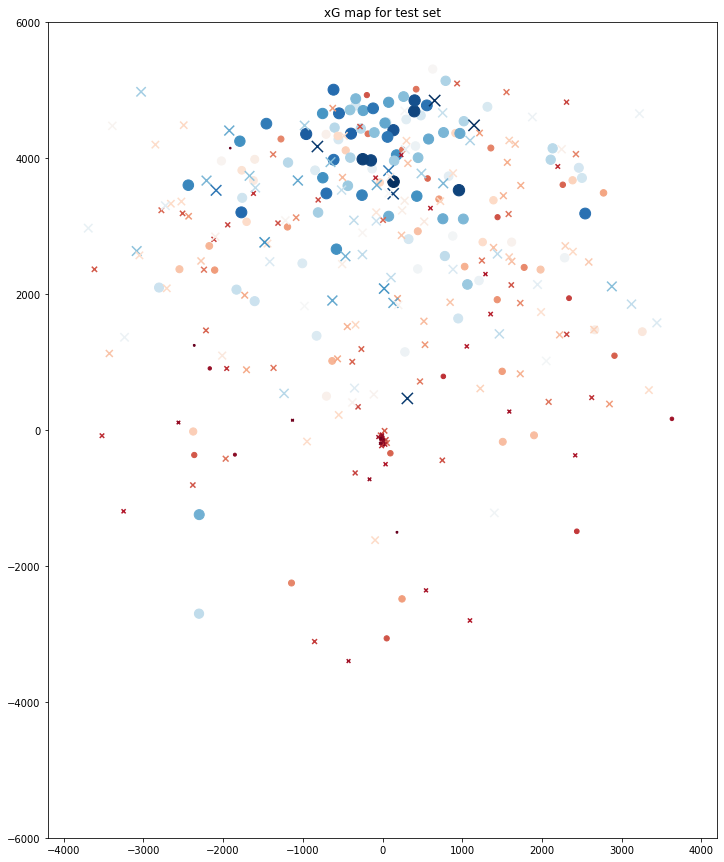

In [16]:
fig = plt.figure(figsize=(12,15))
goals = final_vals[[idx for idx in range(len(y_test)) if y_test[idx] == 1], :]
misses = final_vals[[idx for idx in range(len(y_test)) if y_test[idx] == 0], :]
plt.scatter(goals[:,1], goals[:,2], s=goals[:,3]*1.5, alpha=1, cmap="RdBu", c=goals[:,3], marker='o')
plt.scatter(misses[:,1], misses[:,2], s=misses[:,3]*1.5, alpha=1, cmap="RdBu", c=misses[:,3], marker='x')
# c=["red" if x<50 else "blue" for x in final_vals[:,2]],
plt.ylim([-6000, 6000])
plt.xlim([-4200, 4200])
plt.title("xG map for test set")
plt.show()

In [17]:
eli5.explain_weights_sklearn(reg, feature_names=list(data_filtered.columns[1:-1]))

Explanation(estimator='LogisticRegression(max_iter=400, random_state=0)', description="\nFeatures with largest coefficients.\nCaveats:\n1. Be careful with features which are not\n   independent - weights don't show their importance.\n2. If scale of input features is different then scale of coefficients\n   will also be different, making direct comparison between coefficient values\n   incorrect.\n3. Depending on regularization, rare features sometimes may have high\n   coefficients; this doesn't mean they contribute much to the\n   classification result for most examples.\n", error=None, method='linear model', is_regression=False, targets=[TargetExplanation(target=1, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='shot_taker_pos_y', weight=1.0839782449604385, std=None, value=None), FeatureWeight(feature='shot_taker_vel_z', weight=0.4340374709059886, std=None, value=None), FeatureWeight(feature='shot_taker_vel_y', weight=0.3046939119335555, std=None, value=None), FeatureWeight(feature='shot_taker_ang_vel_y', weight=0.16978639321523012, std=None, value=None), FeatureWeight(feature='opp_1_vel_y', weight=0.158563507470398, std=None, value=None), FeatureWeight(feature='opp_1_pos_z', weight=0.15578313483212167, std=None, value=None), FeatureWeight(feature='opp_2_rot_y', weight=0.12262735711844834, std=None, value=None), FeatureWeight(feature='opp_1_rot_x', weight=0.10079426292166266, std=None, value=None), FeatureWeight(feature='shot_taker_pos_z', weight=0.08256434786261466, std=None, value=None)], neg=[FeatureWeight(feature='<BIAS>', weight=-0.5205895767820776, std=None, value=None), FeatureWeight(feature='opp_2_pos_y', weight=-0.33951413182177453, std=None, value=None), FeatureWeight(feature='opp_1_pos_y', weight=-0.32424344347853123, std=None, value=None), FeatureWeight(feature='opp_2_vel_z', weight=-0.21023718493753105, std=None, value=None), FeatureWeight(feature='shot_taker_ang_vel_x', weight=-0.1847590326900817, std=None, value=None), FeatureWeight(feature='opp_2_rot_x', weight=-0.15268926703975583, std=None, value=None), FeatureWeight(feature='shot_taker_rot_x', weight=-0.11226797169453197, std=None, value=None), FeatureWeight(feature='opp_2_ang_vel_x', weight=-0.10939886299681865, std=None, value=None), FeatureWeight(feature='opp_2_ang_vel_y', weight=-0.10653446108593219, std=None, value=None), FeatureWeight(feature='opp_2_vel_x', weight=-0.09558231844725007, std=None, value=None), FeatureWeight(feature='opp_1_ang_vel_z', weight=-0.08065833198018031, std=None, value=None)], pos_remaining=6, neg_remaining=11), proba=None, score=None, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

In [18]:
# find shot in test with highest xG
e = reg.predict_proba(scaled_X_test)[:,1]
e = reg.predict_proba(scaled_X_train)[:,1]
# ind = np.argpartition(e, 0)[-5:]
ind = (-e).argsort()[:50]
ind

array([1263,    7,  715,  961, 1015, 1293, 1311, 1306, 1299,  940, 1071,
       1144, 1199,  524, 1226, 1045,  613,   57, 1037,  822, 1159,  984,
       1111,  941,  846,  519,  219,  329,  878, 1190,  254,  269, 1014,
        986,   67,  968, 1185, 1091,  372,  173,  962, 1283,  721,  685,
       1158,  518,  304,  696,  291,  271], dtype=int64)

In [19]:
# ex_shot = 173
# entry = X_test[ex_shot]
is_train = True
for shot_id in ind:
    ex_shot = shot_id
    entry = X_train[shot_id]
    if y_train[shot_id] == 1:
        print(y_train[shot_id], shot_id)
        break
cols = data_filtered.columns.tolist()
shot_idx = cols.index("shot_taker_pos_x")
x_pos = entry[shot_idx]
y_pos = entry[shot_idx+1]
vel_idx = cols.index("shot_taker_vel_x")
x_vel = entry[vel_idx]
y_vel = entry[vel_idx+1]

opp1_idx = cols.index("opp_1_pos_x")
opp_1_x = entry[opp1_idx]
opp_1_y = entry[opp1_idx+1]
opp1_idx = cols.index("opp_1_vel_x")
opp_1_x_vel = entry[opp1_idx]
opp_1_y_vel = entry[opp1_idx+1]

opp2_idx = cols.index("opp_2_pos_x")
opp_2_x = entry[opp2_idx]
opp_2_y = entry[opp2_idx+1]
opp2_idx = cols.index("opp_2_vel_x")
opp_2_x_vel = entry[opp2_idx]
opp_2_y_vel = entry[opp2_idx+1]

shot_id = entry[0]
raw_entry = data[data['idx'] == shot_id].iloc[0]
ball_x = raw_entry['ball_pos_x']
ball_y = raw_entry['ball_pos_y']
ball_x_vel = raw_entry['ball_vel_x']
ball_y_vel = raw_entry['ball_vel_y']
shot_taker_name = raw_entry['shot_taker_name']

tm_x = raw_entry['team_mate_pos_x']
tm_y = raw_entry['team_mate_pos_y']
tm_x_vel = raw_entry['team_mate_vel_x']
tm_y_vel = raw_entry['team_mate_pos_y']

1 1263


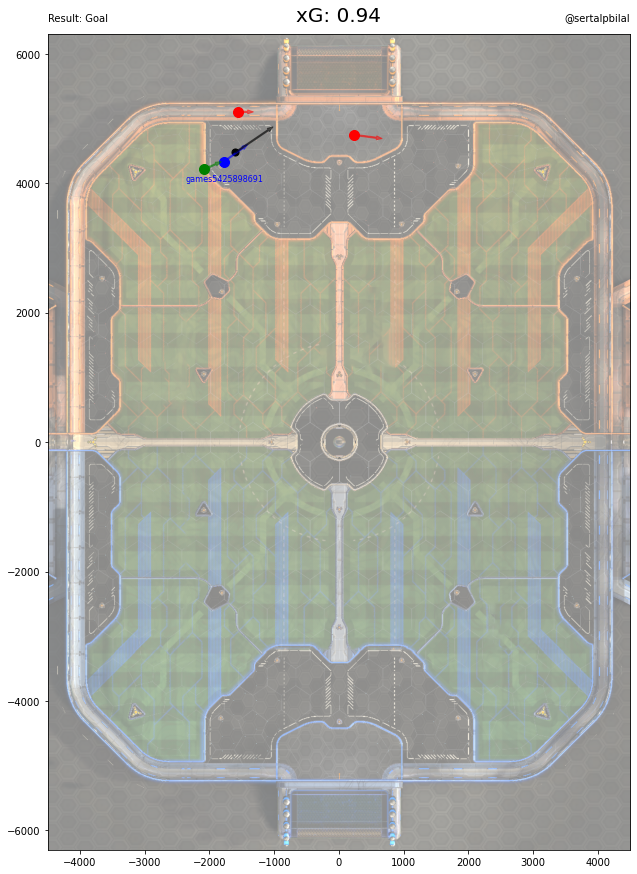

In [20]:
fig, ax = plt.subplots(figsize=(12,15))

# Shot taker
ax.scatter(x_pos, y_pos, c='blue', s=100)
ax.arrow(x_pos, y_pos, x_vel/50, y_vel/50, shape='full', width=20, alpha=0.5, color='blue')
ax.text(x_pos, y_pos - 300, s=shot_taker_name, ha='center', fontsize=8, color='blue')

# Team mate
ax.scatter(tm_x, tm_y, c='green', s=100)
ax.arrow(tm_x, tm_y, tm_x_vel/50, tm_y_vel/50, shape='full', width=20, alpha=0.5, color='green')

# Opposition 1
ax.scatter(opp_1_x, opp_1_y, c='red', s=100)
ax.arrow(opp_1_x, opp_1_y, opp_1_x_vel/50, opp_1_y_vel/50, shape='full', width=20, alpha=0.5, color='red')

# Opposition 2
ax.scatter(opp_2_x, opp_2_y, c='red', s=100)
ax.arrow(opp_2_x, opp_2_y, opp_2_x_vel/50, opp_2_y_vel/50, shape='full', width=20, alpha=0.5, color='red')

# Ball
ax.scatter(ball_x, ball_y, c='black', s=50)
ax.arrow(ball_x, ball_y, ball_x_vel/50, ball_y_vel/50, shape='full', width=20, alpha=0.5, color='black')

# Plot settings & Text
ax.text(4500, 6500, s="@sertalpbilal", ha='right', fontsize=10)
ax.set_ylim([-6300, 6300])
ax.set_xlim([-4500, 4500])
if is_train:
    # pred = "Goal" if reg.predict([scaled_X_train[ex_shot]])[0] == 1 else "No Goal"
    actu = "Goal" if y_train[ex_shot] == 1 else "No Goal"
    xg = round(reg.predict_proba([scaled_X_train[ex_shot]])[0][1],2)
else:
    # pred = "Goal" if reg.predict([scaled_X_test[ex_shot]])[0] == 1 else "No Goal"
    actu = "Goal" if y_test[ex_shot] == 1 else "No Goal"
    xg = round(reg.predict_proba([scaled_X_test[ex_shot]])[0][1],2)
# ax.text(-4633, 6500, s=f'Prediction: {pred}, Result: {actu}')
ax.text(-4500, 6500, s=f'Result: {actu}')
img = plt.imread("../pitch.png")
ax.text(0, 6500, s=f"xG: {xg}", ha='center', fontsize=20)
ax.imshow(img, extent=[-4530, 4633, -6300, 6368], alpha=0.5)

# ax.axline((0,-6000), (0,6000))
# ax.axline((-4000,0), (4000,0))


In [21]:
# Specific game
game = "0453b86b-d328-47da-8098-e31f09960830"
game_data = pd.read_csv(f"../data/xg/{game}.csv")
game_data = game_data.rename(columns={'Unnamed: 0': 'idx'})
game_data_filtered = game_data[['shot_taker_name'] + col_list]
# game_data_filtered.head()
game_xg = [i[1] for i in reg.predict_proba(sc.transform(game_data_filtered.values[:, 2:-1]))]
game_data_copy = game_data.copy()
game_data_copy['xg'] = game_xg
print(game_data_copy.groupby('shot_taker_name')['xg'].sum())
game_data_copy

shot_taker_name
SniperJAYBO        0.396944
enpitsu            1.959351
games5425898691    0.216666
hwillo             2.965566
Name: xg, dtype: float64


idx  frame   time   goal  is_orange  distanceToGoal   ball_pos_x  \
0     0    177    0.0  False          1     5233.940023     9.220000   
1     1    914   26.0  False          0     3227.818506  2131.229980   
2     2   1380   43.0  False          1     4922.693597 -1146.439941   
3     3   1478   47.0   True          1     1621.853974  -713.719971   
4     4   1793   49.0   True          1     4788.998147   751.909973   
5     5   2681   72.0  False          0     5118.181495 -2512.870117   
6     6   3103   88.0  False          0     2465.727636 -1362.479980   
7     7   4597  142.0  False          1     4753.430693  2597.000000   
8     8   5155  162.0  False          0     2571.636748   352.149994   
9     9   5752  184.0   True          0     2649.399254 -2931.669922   
10   10   7064  223.0  False          0     3368.370866 -2611.280029   
11   11   7725  247.0   True          0     1771.952556   543.789978   
12   12   8761  275.0  False          1     2697.882350   876.250000   
13   13  10489  332.0  False          0     5246.008472   619.820007   
14   14  12048  388.0  False          0     2180.652784   664.210022   
15   15  12438  403.0   True          0     1458.087935 -1869.660034   

     ball_pos_y  ball_pos_z    ball_vel_x  ...  opp_2_rot_z  opp_2_ball_cam  \
0    -18.270000  107.360001   1304.700012  ...     0.311069            True   
1   4019.870117  263.209991 -16015.699463  ...    -0.000010            True   
2    661.010010  141.539993   9098.499756  ...    -0.006557            True   
3   4941.979980  218.990005   3942.300110  ...    -0.005910            True   
4    353.170013  109.919998  -6646.500244  ...     0.000107            True   
5    283.920013  100.290001  11253.000488  ...     0.000036            True   
6   2718.800049  168.839996  11831.600342  ...    -0.048384            True   
7    701.340027  152.750000 -10896.500244  ...     0.000048            True   
8   2891.570068   99.389999  -3365.400085  ...    -0.019332            True   
9   3444.310059  110.919998  18610.899658  ...     0.455844            True   
10  2241.080078  212.710007  10214.799805  ...     0.630161            True   
11  4107.129883  376.109985  -5586.400146  ...     0.000103            True   
12  2442.189941  249.770004  -9377.700195  ...     0.000002            True   
13   117.760002  170.500000   -710.599976  ...     0.000448            True   
14  3616.520020  113.769997  -5487.700195  ...     0.714593            True   
15  4054.639893  168.720001  27514.899902  ...     0.270153            True   

    opp_2_boost  opp_2_boost_active  opp_2_jump_active  \
0     31.000000               False                  4   
1     92.000000               False                 12   
2           NaN               False                 16   
3    216.000000               False                 18   
4     31.000000               False                  4   
5    110.907140                True                  8   
6     94.000000               False                 10   
7    116.000000               False              False   
8    229.922847                True                 30   
9    255.000000               False                 36   
10     2.000000               False                 12   
11          NaN               False                 22   
12   109.000000               False                 12   
13    68.000000               False                 18   
14    10.000000               False                 40   
15   163.010968                True                 42   

    opp_2_double_jump_active  opp_2_dodge_active  opp_2_boost_collect  \
0                      False                   3                  NaN   
1                      False                  12                  NaN   
2                      False                  15                  NaN   
3                          4                  16                  NaN   
4                      False                   4                  NaN   
5         

In [22]:
def plot_the_shot(data, entry, cols):

    shot_idx = cols.index("shot_taker_pos_x")
    x_pos = entry[shot_idx]
    y_pos = entry[shot_idx+1]
    vel_idx = cols.index("shot_taker_vel_x")
    x_vel = entry[vel_idx]
    y_vel = entry[vel_idx+1]

    opp1_idx = cols.index("opp_1_pos_x")
    opp_1_x = entry[opp1_idx]
    opp_1_y = entry[opp1_idx+1]
    opp1_idx = cols.index("opp_1_vel_x")
    opp_1_x_vel = entry[opp1_idx]
    opp_1_y_vel = entry[opp1_idx+1]

    opp2_idx = cols.index("opp_2_pos_x")
    opp_2_x = entry[opp2_idx]
    opp_2_y = entry[opp2_idx+1]
    opp2_idx = cols.index("opp_2_vel_x")
    opp_2_x_vel = entry[opp2_idx]
    opp_2_y_vel = entry[opp2_idx+1]

    shot_id = entry[0]
    raw_entry = data[data['idx'] == shot_id].iloc[0]
    ball_x = raw_entry['ball_pos_x']
    ball_y = raw_entry['ball_pos_y']
    ball_x_vel = raw_entry['ball_vel_x']
    ball_y_vel = raw_entry['ball_vel_y']
    shot_taker_name = raw_entry['shot_taker_name']

    tm_x = raw_entry['team_mate_pos_x']
    tm_y = raw_entry['team_mate_pos_y']
    tm_x_vel = raw_entry['team_mate_vel_x']
    tm_y_vel = raw_entry['team_mate_pos_y']

    fig, ax = plt.subplots(figsize=(12,15))

    # Shot taker
    ax.scatter(x_pos, y_pos, c='blue', s=100)
    ax.arrow(x_pos, y_pos, x_vel/50, y_vel/50, shape='full', width=20, alpha=0.5, color='blue')
    ax.text(x_pos, y_pos - 300, s=shot_taker_name, ha='center', fontsize=8, color='blue')

    # Team mate
    ax.scatter(tm_x, tm_y, c='green', s=100)
    ax.arrow(tm_x, tm_y, tm_x_vel/50, tm_y_vel/50, shape='full', width=20, alpha=0.5, color='green')

    # Opposition 1
    ax.scatter(opp_1_x, opp_1_y, c='red', s=100)
    ax.arrow(opp_1_x, opp_1_y, opp_1_x_vel/50, opp_1_y_vel/50, shape='full', width=20, alpha=0.5, color='red')

    # Opposition 2
    ax.scatter(opp_2_x, opp_2_y, c='red', s=100)
    ax.arrow(opp_2_x, opp_2_y, opp_2_x_vel/50, opp_2_y_vel/50, shape='full', width=20, alpha=0.5, color='red')

    # Ball
    ax.scatter(ball_x, ball_y, c='black', s=50)
    ax.arrow(ball_x, ball_y, ball_x_vel/50, ball_y_vel/50, shape='full', width=20, alpha=0.5, color='black')

    # Plot settings & Text
    ax.text(4500, 6500, s="@sertalpbilal", ha='right', fontsize=10)
    ax.set_ylim([-6300, 6300])
    ax.set_xlim([-4500, 4500])
    actu = "Goal" if entry['goal'] else "No Goal"
    xg = round(entry['xg'],3)
    # ax.text(-4633, 6500, s=f'Prediction: {pred}, Result: {actu}')
    ax.text(-4500, 6500, s=f'Result: {actu}')
    img = plt.imread("../pitch.png")
    ax.text(0, 6500, s=f"xG: {xg}", ha='center', fontsize=20)
    ax.imshow(img, extent=[-4530, 4633, -6300, 6368], alpha=0.5)
    return None

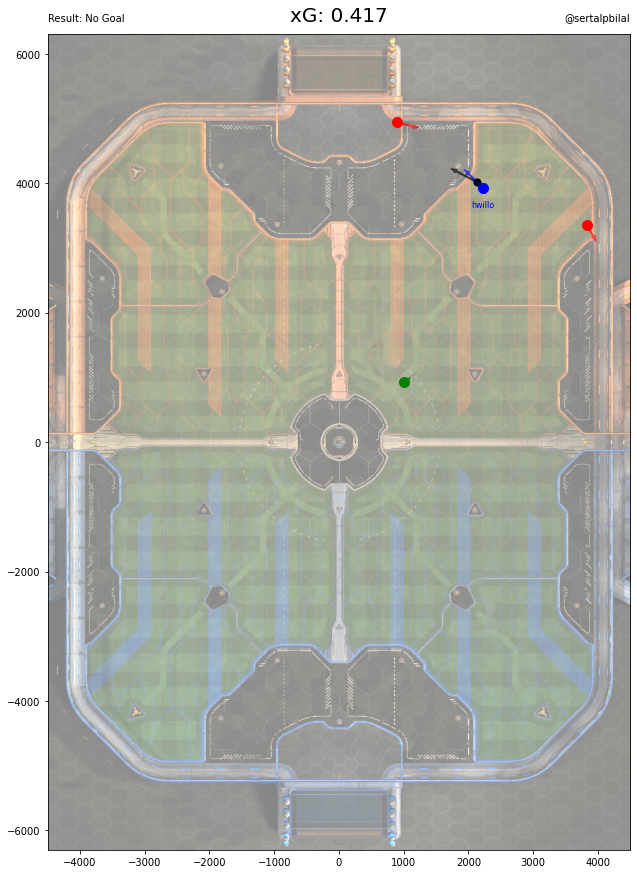

In [23]:
plot_the_shot(game_data_copy, game_data_copy.iloc[1], game_data_copy.columns.to_list())